# 술 많이 마시는 사람들의 특징

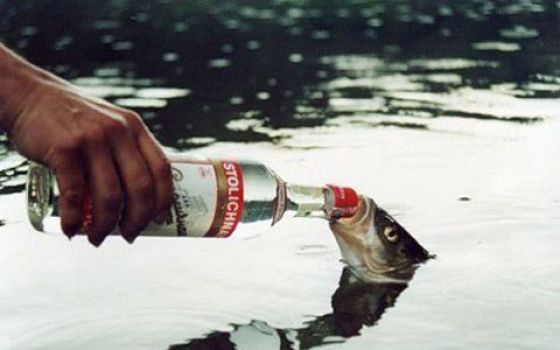

In [178]:
Image.open('술고래.jpg')

                                 술고래

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='Malgun Gothic')

data = pd.read_excel('국민건강영양조사2018.xlsx')


In [174]:
from PIL import Image

## 1.데이터 가공

In [84]:
data20= data[data['age']>= 20]

In [187]:
#음주를 많이 하고 많이 먹는 사람(주 2회 이상, 한 번 마실 때 5잔 이상씩(가득찬 잔 기준 약 1병)마시는 사람)
data20['much_alcohol']= np.arange(len(data20))
data20['much_alcohol'].where(((data20['BD2_1']==4) |(data20['BD2_1']==5)|(data20['BD2_1']==3)) & ((data20['BD1_11']==5) | (data20['BD1_11']==6)),0,inplace=True)
data20['much_alcohol']=[0 if s==0 else 1 for s in data20['much_alcohol'] ]

#주관적 건강상태 데이터 다듬기(1,2,3은 좋음(1), 4,5는 나쁨(0)이라 생각한다고하고 처리)
health_drop_data_name=data20[(data20['D_1_1']!= 1) & (data20['D_1_1']!= 2) & (data20['D_1_1']!= 3)&(data20['D_1_1']!= 4)&(data20['D_1_1']!= 5)][['D_1_1']].index
data20.drop(health_drop_data_name, inplace=True)
data20['D_1_1']= [0 if (s==4)or(s==5) else 1 for s in data20['D_1_1'] ]
#주택소유여부 데이터 다듬기(있으면 1 없으면 0으로 처리)
house_drop_data_name=data20[data20['house']== 9].index
data20.drop(house_drop_data_name, inplace=True)
data20['house']= [0 if s==1 else 1 for s in data20['house'] ]
#기초생활수급 여부 데이터 다듬기(있으면 1 없으면 0으로 처리)
data20['allownc']= [1 if s==10 else 0 for s in data20['allownc'] ]

#고혈압 여부 데이터 다듬기(있으면 1 없으면 0)
gohyeorap_drop_data_name=data20[(data20['DI1_dg']!= 1) & (data20['DI1_dg']!= 0)].index
data20.drop(gohyeorap_drop_data_name, inplace=True)
data20['DI1_dg']= [1 if s==1 else 0 for s in data20['DI1_dg'] ]
#고지혈증 여부 데이터 다듬기(있으면 1 없으면 0)
gojihyeoljeung_drop_data_name=data20[(data20['DI2_dg']!= 1) & (data20['DI2_dg']!= 0)].index
data20.drop(gojihyeoljeung_drop_data_name, inplace=True)
data20['DI2_dg']= [1 if s==1 else 0 for s in data20['DI2_dg'] ]
#뇌졸중 여부 데이터 다듬기(있으면 1 없으면 0)
noejoljung_drop_data_name=data20[(data20['DI3_dg']!= 1) & (data20['DI3_dg']!= 0)].index
data20.drop(noejoljung_drop_data_name, inplace=True)
data20['DI3_dg']= [1 if s==1 else 0 for s in data20['DI3_dg'] ]
#심근경색증 여부 데이터 다듬기(있으면 1 없으면 0)
simgeungyeongsaekjeung_drop_data_name=data20[(data20['DI5_dg']!= 1) & (data20['DI5_dg']!= 0)].index
data20.drop(simgeungyeongsaekjeung_drop_data_name, inplace=True)
data20['DI5_dg']= [1 if s==1 else 0 for s in data20['DI5_dg'] ]
#협심증 여부 데이터 다듬기(있으면 1 없으면 0)
hyeopsimjeung_drop_data_name=data20[(data20['DI6_dg']!= 1) & (data20['DI6_dg']!= 0)].index
data20.drop(hyeopsimjeung_drop_data_name, inplace=True)
data20['DI6_dg']= [1 if s==1 else 0 for s in data20['DI6_dg'] ]

#골관절염 여부 데이터 다듬기(있으면 1 없으면 0)
golgwanjeoryeom_drop_data_name=data20[(data20['DM2_dg']!= 1) & (data20['DM2_dg']!= 0)].index
data20.drop(golgwanjeoryeom_drop_data_name, inplace=True)
data20['DM2_dg']= [1 if s==1 else 0 for s in data20['DM2_dg'] ]
#류마티스 관절염 여부 데이터 다듬기(있으면 1 없으면 0)
ryumatiseugwanjeoryeom_drop_data_name=data20[(data20['DM3_dg']!= 1) & (data20['DM3_dg']!= 0)].index
data20.drop(ryumatiseugwanjeoryeom_drop_data_name, inplace=True)
data20['DM3_dg']= [1 if s==1 else 0 for s in data20['DM3_dg'] ]
#골다공증 여부 데이터 다듬기(있으면 1 없으면 0)
goldagongjeung_drop_data_name=data20[(data20['DM4_dg']!= 1) & (data20['DM4_dg']!= 0)].index
data20.drop(goldagongjeung_drop_data_name, inplace=True)
data20['DM4_dg']= [1 if s==1 else 0 for s in data20['DM4_dg'] ]

#폐결핵 여부 데이터 다듬기(있으면 1 없으면 0)
pyegyeolhaek_drop_data_name=data20[(data20['DJ2_dg']!= 1) & (data20['DJ2_dg']!= 0)].index
data20.drop(pyegyeolhaek_drop_data_name, inplace=True)
data20['DJ2_dg']= [1 if s==1 else 0 for s in data20['DJ2_dg'] ]

#당뇨병 여부 데이터 다듬기(있으면 1 없으면 0)
dangnyobyeong_drop_data_name=data20[(data20['DE1_dg']!= 1) & (data20['DE1_dg']!= 0)].index
data20.drop(dangnyobyeong_drop_data_name, inplace=True)
data20['DE1_dg']= [1 if s==1 else 0 for s in data20['DE1_dg'] ]
#갑상선 여부 데이터 다듬기(있으면 1 없으면 0)
gapsangseon_drop_data_name=data20[(data20['DE2_dg']!= 1) & (data20['DE2_dg']!= 0)].index
data20.drop(gapsangseon_drop_data_name, inplace=True)
data20['DE2_dg']= [1 if s==1 else 0 for s in data20['DE2_dg'] ]

#위암 여부 데이터 다듬기(있으면 1 없으면 0)
wiam_drop_data_name=data20[(data20['DC1_dg']!= 1) & (data20['DC1_dg']!= 0)].index
data20.drop(wiam_drop_data_name, inplace=True)
data20['DC1_dg']= [1 if s==1 else 0 for s in data20['DC1_dg'] ]
#간암 여부 데이터 다듬기(있으면 1 없으면 0)
ganam_drop_data_name=data20[(data20['DC2_dg']!= 1) & (data20['DC2_dg']!= 0)].index
data20.drop(ganam_drop_data_name, inplace=True)
data20['DC2_dg']= [1 if s==1 else 0 for s in data20['DC2_dg'] ]
#대장암 여부 데이터 다듬기(있으면 1 없으면 0)
daejangam_drop_data_name=data20[(data20['DC3_dg']!= 1) & (data20['DC3_dg']!= 0)].index
data20.drop(daejangam_drop_data_name, inplace=True)
data20['DC3_dg']= [1 if s==1 else 0 for s in data20['DC3_dg'] ]
#폐암 여부 데이터 다듬기(있으면 1 없으면 0)
pyeam_drop_data_name=data20[(data20['DC6_dg']!= 1) & (data20['DC6_dg']!= 0)].index
data20.drop(pyeam_drop_data_name, inplace=True)
data20['DC6_dg']= [1 if s==1 else 0 for s in data20['DC6_dg'] ]
#갑상선암 여부 데이터 다듬기(있으면 1 없으면 0)
gapsangseonam_drop_data_name=data20[(data20['DC7_dg']!= 1) & (data20['DC7_dg']!= 0)].index
data20.drop(gapsangseonam_drop_data_name, inplace=True)
data20['DC7_dg']= [1 if s==1 else 0 for s in data20['DC7_dg'] ]

#우울증
# DF2_dg
data20['DF2_dg']= [1 if s==1 else 0 for s in data20['DF2_dg'] ]
  
#건강검진 유무 여부 데이터 다듬기(있으면 1 없으면 0)
geonganggeomjin_drop_data_name=data20[(data20['BH1']!= 1) & (data20['BH1']!= 2)].index
data20.drop(geonganggeomjin_drop_data_name, inplace=True)
data20['BH1']= [1 if s==1 else 0 for s in data20['BH1'] ]

#활동제한 여부 데이터 다듬기(있으면 1 없으면 0)
hwaldongjehan_drop_data_name=data20[(data20['LQ4_00']!= 1) & (data20['LQ4_00']!= 2)].index
data20.drop(hwaldongjehan_drop_data_name, inplace=True)
data20['LQ4_00']= [1 if s==1 else 0 for s in data20['LQ4_00'] ]

#최근 한 달 와병 여부 데이터 다듬기(있으면 1 없으면 0)
wabyeong_drop_data_name=data20[(data20['LQ1_sb']!= 1) & (data20['LQ1_sb']!= 2)].index
data20.drop(wabyeong_drop_data_name, inplace=True)
data20['LQ1_sb']= [1 if s==1 else 0 for s in data20['LQ1_sb'] ]

#최근 1년 동안의 사고 여부 데이터 다듬기(있으면 1 없으면 0)
sonsang_drop_data_name=data20[(data20['AC1_yr']!= 1) & (data20['AC1_yr']!= 2)].index
data20.drop(sonsang_drop_data_name, inplace=True)
data20['AC1_yr']= [1 if s==1 else 0 for s in data20['AC1_yr'] ]


#직업 여부 데이터 다듬기(있으면 1 없으면 0)
jigeop_drop_data_name=data20[(data20['EC1_1']!= 1) & (data20['EC1_1']!= 2)].index
data20.drop(jigeop_drop_data_name, inplace=True)
data20['EC1_1']= [1 if s==1 else 0 for s in data20['EC1_1'] ]

#주관적 체형 인식 데이터 다듬기(비만 1      보통,마름 0)
biman_drop_data_name=data20[(data20['BO1']!= 1) & (data20['BO1']!= 2) & (data20['BO1']!= 3)&(data20['BO1']!= 4)&(data20['BO1']!= 5)][['BO1']].index
data20.drop(biman_drop_data_name, inplace=True)
data20['BO1']= [1 if (s==4)or(s==5) else 0 for s in data20['BO1'] ]

#절주 권유 여부 데이터 다듬기(있으면 1 없으면 0)
jeolju_drop_data_name=data20[(data20['BD7_4']!= 1) & (data20['BD7_4']!= 2) & (data20['BD7_4']!= 3)].index
data20.drop(jeolju_drop_data_name, inplace=True)
data20['BD7_4']= [1 if s==3 else 0 for s in data20['BD7_4'] ]

#스트레스 여부 데이터 다듬기(느끼면 1 아니면 0)
stress_drop_data_name=data20[(data20['BP1']!= 1) & (data20['BP1']!= 2) & (data20['BP1']!= 3)&(data20['BP1']!= 4)][['BP1']].index
data20.drop(stress_drop_data_name, inplace=True)
data20['BP1']= [1 if (s==1)or(s==2) else 0 for s in data20['BP1'] ]

#흡연경험 여부 데이터 다듬기(있으면 1 없으면 0)
heubyeon_drop_data_name=data20[(data20['BS1_1']!= 1) & (data20['BS1_1']!= 2) & (data20['BS1_1']!= 3)].index
data20.drop(heubyeon_drop_data_name, inplace=True)
data20['BS1_1']= [0 if s==3 else 1 for s in data20['BS1_1'] ]

#비만 여부 데이터 다듬기(체질량 지수가 보통 범위인 18.5~25를 절반으로 나눈 21.75위면 1 아니면 0)
data20['HE_BMI'] = data20['HE_BMI'].apply(pd.to_numeric, errors = 'coerce')
data20['HE_BMI']=[1 if s >=21.75 else 0 for s in data20['HE_BMI']]

#어제 양치질 여부(했으면 1 아니면 0)
# BM1_0
data20['BM1_0']= [1 if s==1 else 0 for s in data20['BM1_0'] ]

#치아 손상 경험 여부(있으면 1 없으면 0)
# BM13
data20['BM13']= [1 if s==1 else 0 for s in data20['BM13'] ]

#영양교육 여부 데이터 다듬기(있으면 1 없으면 0)
yeongyanggyoyuk_drop_data_name=data20[(data20['LK_EDU']!= 1) & (data20['LK_EDU']!= 2)].index
data20.drop(yeongyanggyoyuk_drop_data_name, inplace=True)
data20['LK_EDU']= [1 if s==1 else 0 for s in data20['LK_EDU'] ]

#결혼 여부 데이터 다듬기(했으면1 안했으면 0)
marri_drop_data_name=data20[(data20['marri_1']!= 1) & (data20['marri_1']!= 2)].index
data20.drop(marri_drop_data_name, inplace=True)
data20['marri_1']= [1 if s==1 else 0 for s in data20['marri_1'] ]


<ipython-input-187-0541e3358fe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['much_alcohol']= np.arange(len(data20))
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-187-0541e3358fe7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

<ipython-input-187-0541e3358fe7>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['BH1']= [1 if s==1 else 0 for s in data20['BH1'] ]
<ipython-input-187-0541e3358fe7>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['LQ4_00']= [1 if s==1 else 0 for s in data20['LQ4_00'] ]
<ipython-input-187-0541e3358fe7>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [93]:
real_data = data20[['much_alcohol','D_1_1','house','allownc','DI1_dg','DI2_dg','DI3_dg','DI5_dg','DI6_dg','DM2_dg','DM3_dg','DM4_dg','DJ2_dg','DE1_dg','DE2_dg','DC1_dg','DC2_dg','DC3_dg','DC6_dg','DC7_dg','DF2_dg','BH1','LQ4_00','LQ1_sb','AC1_yr','EC1_1','BO1','BD7_4','BP1','BS1_1','HE_BMI','BM1_0','BM13','LK_EDU','marri_1']]
real_data=real_data.reset_index()
index_list= ['D_1_1','house','allownc','DI1_dg','DI2_dg','DI3_dg','DI5_dg','DI6_dg','DM2_dg','DM3_dg','DM4_dg','DJ2_dg','DE1_dg','DE2_dg','DC1_dg','DC2_dg','DC3_dg','DC6_dg','DC7_dg','DF2_dg','BH1','LQ4_00','LQ1_sb','AC1_yr','EC1_1','BO1','BD7_4','BP1','BS1_1','HE_BMI','BM1_0','BM13','LK_EDU','marri_1']
real_data

,index,much_alcohol,D_1_1,house,allownc,DI1_dg,DI2_dg,DI3_dg,DI5_dg,DI6_dg,...,EC1_1,BO1,BD7_4,BP1,BS1_1,HE_BMI,BM1_0,BM13,LK_EDU,marri_1
0,0,0,1,1,0,1,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
1,1,0,1,1,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,1
2,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,6,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1
4,7,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,7978,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
4620,7981,1,1,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
4621,7982,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
4622,7983,0,0,1,0,0,1,0,0,0,...,1,1,0,0,0,1,1,0,0,1


## 2.AIC 작은거 부터 추가해 가면서 만든 모델 중 AIC가 가장 작은 모델에서 p값으로 한번 더 걸러내기

In [92]:
mod_log=sm.Logit.from_formula('much_alcohol ~ D_1_1+house+allownc+DI1_dg+DI2_dg+DI3_dg+DI5_dg+DI6_dg+DM2_dg+DM3_dg+DM4_dg+DJ2_dg+DE1_dg+DE2_dg+DC1_dg+DC2_dg+DC3_dg+DC6_dg+DC7_dg+DF2_dg+BH1+LQ4_00+LQ1_sb+AC1_yr+EC1_1+BO1+BD7_4+BP1+BS1_1+HE_BMI+BM1_0+BM13+LK_EDU+marri_1', real_data).fit()
mod_log.summary()

         Current function value: 0.314552
         Iterations: 35


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           much_alcohol   No. Observations:                 4624
Model:                          Logit   Df Residuals:                     4589
Method:                           MLE   Df Model:                           34
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                  0.2763
Time:                        01:52:43   Log-Likelihood:                -1454.5
converged:                      False   LL-Null:                       -2009.9
Covariance Type:            nonrobust   LLR p-value:                2.410e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4654      0.481     -7.210      0.000      -4.408      -2.523
D_1_1          0.0734      0.139      0.528      0.598      -0.199       0.346
house         -0.0117      0.108     -0.108      0.914      -0.224       0.200
allownc        0.3874      0.206      1.885      0.059      -0.015       0.790
DI1_dg         0.2086      0.131      1.597      0.110      -0.047       0.465
DI2_dg        -0.2019      0.148     -1.366      0.172      -0.492       0.088
DI3_dg        -0.4900      0.385     -1.272      0.203      -1.245       0.265
DI5_dg        -1.6961      0.769     -2.205      0.027      -3.204      -0.189
DI6_dg        -0.9071      0.431     -2.107      0.035      -1.751      -0.063
DM2_dg        -0.3531      0.217     -1.630      0.103      -0.778       0.071
DM3_dg         0.0635      0.516      0.123      0.902      -0.949       1.076
DM4_dg        -0.6370      0.359     -1.773      0.076      -1.341       0.067
DJ2_dg        -0.5145      0.282     -1.825      0.068      -1.067       0.038
DE1_dg        -0.1739      0.188     -0.927      0.354      -0.542       0.194
DE2_dg        -0.1312      0.297     -0.442      0.659      -0.713       0.451
DC1_dg         0.0788      0.595      0.132      0.895      -1.087       1.245
DC2_dg       -34.7003   4.42e+07  -7.86e-07      1.000   -8.65e+07    8.65e+07
DC3_dg        -0.7674      1.154     -0.665      0.506      -3.030       1.495
DC6_dg       -19.5565   7795.086     -0.003      0.998   -1.53e+04    1.53e+04
DC7_dg        -0.3440      0.605     -0.569      0.569      -1.529       0.841
DF2_dg        -0.0171      0.275     -0.062      0.950      -0.555       0.521
BH1           -0.3713      0.108     -3.443      0.001      -0.583      -0.160
LQ4_00        -0.4441      0.245     -1.812      0.070      -0.924       0.036
LQ1_sb        -0.5751      0.234     -2.454      0.014      -1.034      -0.116
AC1_yr        -0.0269      0.184     -0.146      0.884      -0.387       0.333
EC1_1          0.3804      0.115      3.299      0.001       0.154       0.606
BO1            0.1994      0.110      1.813      0.070      -0.016       0.415
BD7_4          2.3005      0.110     20.864      0.000       2.084       2.517
BP1            0.1592      0.112      1.427      0.154      -0.059       0.378
BS1_1          1.5750      0.109     14.400      0.000       1.361       1.789
HE_BMI         0.1146      0.132      0.870      0.384      -0.143       0.373
BM1_0          0.2719      0.397      0.684      0.494      -0.507       1.050
BM13           0.1098      0.130      0.845      0.398      -0.145       0.365
LK_EDU        -0.4872      0.268     -1.819      0.069      -1.012       0.038
marri_1       -0.0394      0.130     -0.302      0.762      -0.295       0.216
==============================================================================
"""

In [194]:
mod_log.aic

2978.978828025862

In [94]:
mod_log1=sm.Logit.from_formula('much_alcohol ~ D_1_1', real_data).fit()
mod_log2=sm.Logit.from_formula('much_alcohol ~ house', real_data).fit()
mod_log3=sm.Logit.from_formula('much_alcohol ~ allownc', real_data).fit()
mod_log4=sm.Logit.from_formula('much_alcohol ~ DI1_dg', real_data).fit()
mod_log5=sm.Logit.from_formula('much_alcohol ~ DI2_dg', real_data).fit()
mod_log6=sm.Logit.from_formula('much_alcohol ~ DI3_dg', real_data).fit()
mod_log7=sm.Logit.from_formula('much_alcohol ~ DI5_dg', real_data).fit()
mod_log8=sm.Logit.from_formula('much_alcohol ~ DI6_dg', real_data).fit()
mod_log9=sm.Logit.from_formula('much_alcohol ~ DM2_dg', real_data).fit()
mod_log10=sm.Logit.from_formula('much_alcohol ~ DM3_dg', real_data).fit()
mod_log11=sm.Logit.from_formula('much_alcohol ~ DM4_dg', real_data).fit()
mod_log12=sm.Logit.from_formula('much_alcohol ~ DJ2_dg', real_data).fit()
mod_log13=sm.Logit.from_formula('much_alcohol ~ DE1_dg', real_data).fit()
mod_log14=sm.Logit.from_formula('much_alcohol ~ DE2_dg', real_data).fit()
mod_log15=sm.Logit.from_formula('much_alcohol ~ DC1_dg', real_data).fit()
mod_log16=sm.Logit.from_formula('much_alcohol ~ DC2_dg', real_data).fit()
mod_log17=sm.Logit.from_formula('much_alcohol ~ DC3_dg', real_data).fit()
mod_log18=sm.Logit.from_formula('much_alcohol ~ DC6_dg', real_data).fit()
mod_log19=sm.Logit.from_formula('much_alcohol ~ DC7_dg', real_data).fit()
mod_log20=sm.Logit.from_formula('much_alcohol ~ DF2_dg', real_data).fit()
mod_log21=sm.Logit.from_formula('much_alcohol ~ BH1', real_data).fit()
mod_log22=sm.Logit.from_formula('much_alcohol ~ LQ4_00', real_data).fit()
mod_log23=sm.Logit.from_formula('much_alcohol ~ LQ1_sb', real_data).fit()
mod_log24=sm.Logit.from_formula('much_alcohol ~ AC1_yr', real_data).fit()
mod_log25=sm.Logit.from_formula('much_alcohol ~ EC1_1', real_data).fit()
mod_log26=sm.Logit.from_formula('much_alcohol ~ BO1', real_data).fit()
mod_log27=sm.Logit.from_formula('much_alcohol ~ BD7_4', real_data).fit()
mod_log28=sm.Logit.from_formula('much_alcohol ~ BP1', real_data).fit()
mod_log29=sm.Logit.from_formula('much_alcohol ~ BS1_1', real_data).fit()
mod_log30=sm.Logit.from_formula('much_alcohol ~ HE_BMI', real_data).fit()
mod_log31=sm.Logit.from_formula('much_alcohol ~ BM1_0', real_data).fit()
mod_log32=sm.Logit.from_formula('much_alcohol ~ BM13', real_data).fit()
mod_log33=sm.Logit.from_formula('much_alcohol ~ LK_EDU', real_data).fit()
mod_log34=sm.Logit.from_formula('much_alcohol ~ marri_1', real_data).fit()

Optimization terminated successfully.
         Current function value: 0.434636
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434298
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434377
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434639
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434409
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434367
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433823
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.434166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.430471
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433959
  

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 0.434479
         Iterations 7
         Current function value: 0.434340
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.434242
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.434478
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433737
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433595
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433568
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434470
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.426505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433217
         Iterations 6
Optimization ter

In [190]:
aic_data= pd.DataFrame({'AIC':[mod_log1.aic,mod_log2.aic,mod_log3.aic,mod_log4.aic,mod_log5.aic,mod_log6.aic,mod_log7.aic,mod_log8.aic,mod_log9.aic,mod_log10.aic,mod_log11.aic,mod_log12.aic,mod_log13.aic,mod_log14.aic,mod_log15.aic,mod_log16.aic,mod_log17.aic,mod_log18.aic,mod_log19.aic,mod_log20.aic,mod_log21.aic,mod_log22.aic,mod_log23.aic,mod_log24.aic,mod_log25.aic,mod_log26.aic,mod_log27.aic,mod_log28.aic,mod_log29.aic,mod_log30.aic,mod_log31.aic,mod_log32.aic,mod_log33.aic,mod_log34.aic]},index=index_list)
sorted_aic_data=aic_data.sort_values(by="AIC")
sorted_aic_data

,AIC
BD7_4,3305.233144
BS1_1,3510.593580
EC1_1,3948.315241
DM4_dg,3973.670293
DM2_dg,3984.998930
BM13,3996.362270
HE_BMI,3998.937908
BO1,4010.394605
LQ1_sb,4013.638217
LQ4_00,4013.888033


In [191]:
sorted_aic_data.index

Index(['BD7_4', 'BS1_1', 'EC1_1', 'DM4_dg', 'DM2_dg', 'BM13', 'HE_BMI', 'BO1',
       'LQ1_sb', 'LQ4_00', 'BH1', 'DI5_dg', 'LK_EDU', 'BP1', 'DM3_dg',
       'DI6_dg', 'DC7_dg', 'house', 'DC6_dg', 'DJ2_dg', 'DI3_dg', 'allownc',
       'DI2_dg', 'DE2_dg', 'AC1_yr', 'DF2_dg', 'DC3_dg', 'DC2_dg', 'BM1_0',
       'marri_1', 'D_1_1', 'DI1_dg', 'DC1_dg', 'DE1_dg'],
      dtype='object')

In [99]:
a_mod_log1=sm.Logit.from_formula('much_alcohol ~ BD7_4', real_data).fit()
a_mod_log2=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1', real_data).fit()
a_mod_log3=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1', real_data).fit()
a_mod_log4=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg', real_data).fit()
a_mod_log5=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg', real_data).fit()
a_mod_log6=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13', real_data).fit()
a_mod_log7=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI', real_data).fit()
a_mod_log8=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1', real_data).fit()
a_mod_log9=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb', real_data).fit()
a_mod_log10=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00', real_data).fit()
a_mod_log11=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1', real_data).fit()
a_mod_log12=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg', real_data).fit()
a_mod_log13=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU', real_data).fit()
a_mod_log14=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1', real_data).fit()
a_mod_log15=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg', real_data).fit()
a_mod_log16=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg', real_data).fit()
a_mod_log17=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg', real_data).fit()
a_mod_log18=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house', real_data).fit()
a_mod_log19=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg', real_data).fit()
a_mod_log20=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg', real_data).fit()
a_mod_log21=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg', real_data).fit()
a_mod_log22=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc', real_data).fit()
a_mod_log23=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg', real_data).fit()
a_mod_log24=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg', real_data).fit()
a_mod_log25=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr', real_data).fit()
a_mod_log26=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg', real_data).fit()
a_mod_log27=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg', real_data).fit()
a_mod_log28=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg', real_data).fit()
a_mod_log29=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg+BM1_0', real_data).fit()
a_mod_log30=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg+BM1_0+marri_1+D_1_1', real_data).fit()
a_mod_log31=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg+BM1_0+marri_1+D_1_1+DI1_dg', real_data).fit()
a_mod_log32=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg+BM1_0+marri_1+D_1_1+DI1_dg+DC1_dg', real_data).fit()
a_mod_log33=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg+BM1_0+marri_1+D_1_1+DI1_dg+DC1_dg+DE1_dg', real_data).fit()
a_mod_log34=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+DM2_dg+BM13+HE_BMI+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+BP1+DM3_dg+DI6_dg+DC7_dg+house+DC6_dg+DJ2_dg+DI3_dg+allownc+DI2_dg+DE2_dg+AC1_yr+DF2_dg+DC3_dg+DC2_dg+BM1_0+marri_1+D_1_1+DI1_dg+DC1_dg+DE1_dg', real_data).fit()

Optimization terminated successfully.
         Current function value: 0.356967
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.326848
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323448
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322820
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322781
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322522
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322058
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.321359
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320973
  

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 0.315692
         Iterations 29
         Current function value: 0.315331
         Iterations: 35


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.315166
         Iterations: 35
         Current function value: 0.315143
         Iterations: 35

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



         Current function value: 0.315140
         Iterations: 35
         Current function value: 0.315139
         Iterations: 35

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



         Current function value: 0.315086
         Iterations: 35
         Current function value: 0.314979
         Iterations: 35


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.314936
         Iterations: 35
         Current function value: 0.314881
         Iterations: 35


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.314647
         Iterations: 35
         Current function value: 0.314646
         Iterations: 35
         Current function value: 0.314552
         Iterations: 35


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.314552
         Iterations: 35


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [192]:
aic_data2= pd.DataFrame({'AIC':[a_mod_log1.aic,a_mod_log2.aic,a_mod_log3.aic,a_mod_log4.aic,a_mod_log5.aic,a_mod_log6.aic,a_mod_log7.aic,a_mod_log8.aic,a_mod_log9.aic,a_mod_log10.aic,a_mod_log11.aic,a_mod_log12.aic,a_mod_log13.aic,a_mod_log14.aic,a_mod_log15.aic,a_mod_log16.aic,a_mod_log17.aic,a_mod_log18.aic,a_mod_log19.aic,a_mod_log20.aic,a_mod_log21.aic,a_mod_log22.aic,a_mod_log23.aic,a_mod_log24.aic,a_mod_log25.aic,a_mod_log26.aic,a_mod_log27.aic,a_mod_log28.aic,a_mod_log29.aic,a_mod_log30.aic,a_mod_log31.aic,a_mod_log32.aic,a_mod_log33.aic,a_mod_log34.aic]},index=np.arange(1,35))
sorted_aic_data2=aic_data2.sort_values(by="AIC")
sorted_aic_data2

,AIC
22,2962.182961
23,2962.651044
20,2963.050973
21,2963.515860
24,2964.440679
19,2965.113138
16,2965.313692
25,2966.416894
17,2966.873013
14,2967.547594


In [193]:
sorted_aic_data2.index

Int64Index([22, 23, 20, 21, 24, 19, 16, 25, 17, 14, 13, 26, 18, 12, 15, 27, 28,
            29, 31, 30, 11, 32, 34, 33, 10,  9,  8,  5,  7,  6,  4,  3,  2,
             1],
           dtype='int64')

In [189]:
a_mod_log22.aic

2962.1829613414247

In [101]:
a_mod_log22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           much_alcohol   No. Observations:                 4624
Model:                          Logit   Df Residuals:                     4601
Method:                           MLE   Df Model:                           22
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                  0.2746
Time:                        01:56:54   Log-Likelihood:                -1458.1
converged:                      False   LL-Null:                       -2009.9
Covariance Type:            nonrobust   LLR p-value:                1.608e-219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1885      0.176    -18.086      0.000      -3.534      -2.843
BD7_4          2.2903      0.109     20.938      0.000       2.076       2.505
BS1_1          1.5706      0.109     14.458      0.000       1.358       1.784
EC1_1          0.3856      0.114      3.377      0.001       0.162       0.609
DM4_dg        -0.6541      0.357     -1.835      0.067      -1.353       0.045
DM2_dg        -0.3453      0.214     -1.616      0.106      -0.764       0.073
BM13           0.1138      0.130      0.877      0.381      -0.141       0.368
HE_BMI         0.1150      0.130      0.882      0.378      -0.141       0.371
BO1            0.1903      0.109      1.749      0.080      -0.023       0.404
LQ1_sb        -0.5743      0.232     -2.472      0.013      -1.030      -0.119
LQ4_00        -0.4815      0.239     -2.016      0.044      -0.950      -0.013
BH1           -0.3675      0.105     -3.487      0.000      -0.574      -0.161
DI5_dg        -1.7344      0.767     -2.261      0.024      -3.238      -0.231
LK_EDU        -0.4825      0.266     -1.811      0.070      -1.005       0.040
BP1            0.1457      0.109      1.337      0.181      -0.068       0.359
DM3_dg         0.0617      0.514      0.120      0.904      -0.946       1.070
DI6_dg        -0.9340      0.430     -2.173      0.030      -1.776      -0.092
DC7_dg        -0.3815      0.604     -0.632      0.527      -1.565       0.802
house         -0.0058      0.107     -0.054      0.957      -0.215       0.204
DC6_dg       -19.6857   8294.769     -0.002      0.998   -1.63e+04    1.62e+04
DJ2_dg        -0.5184      0.280     -1.852      0.064      -1.067       0.030
DI3_dg        -0.4687      0.381     -1.229      0.219      -1.216       0.279
allownc        0.3802      0.205      1.859      0.063      -0.021       0.781
==============================================================================
"""

In [225]:
#유의수준이 0.1인 모델과 유의수준이 0.05인 모델
a_mod_log90=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+DM4_dg+BO1+LQ1_sb+LQ4_00+BH1+DI5_dg+LK_EDU+DI6_dg+DJ2_dg+allownc', real_data).fit()
a_mod_log95=sm.Logit.from_formula('much_alcohol ~ BD7_4+BS1_1+EC1_1+LQ1_sb+LQ4_00+BH1+DI5_dg+DI6_dg', real_data).fit()


Optimization terminated successfully.
         Current function value: 0.316837
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.319264
         Iterations 8


In [67]:
a_mod_log90.aic,a_mod_log95.aic,a_mod_log22.aic

(2958.107418921596, 2970.55606424384, 2962.1829613414247)

In [68]:
a_mod_log90.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           much_alcohol   No. Observations:                 4624
Model:                          Logit   Df Residuals:                     4610
Method:                           MLE   Df Model:                           13
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                  0.2711
Time:                        01:29:36   Log-Likelihood:                -1465.1
converged:                       True   LL-Null:                       -2009.9
Covariance Type:            nonrobust   LLR p-value:                9.090e-225
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1332      0.146    -21.412      0.000      -3.420      -2.846
BD7_4          2.2985      0.109     21.140      0.000       2.085       2.512
BS1_1          1.5957      0.107     14.966      0.000       1.387       1.805
EC1_1          0.4161      0.113      3.673      0.000       0.194       0.638
DM4_dg        -0.7490      0.350     -2.137      0.033      -1.436      -0.062
BO1            0.2279      0.096      2.369      0.018       0.039       0.416
LQ1_sb        -0.5332      0.231     -2.313      0.021      -0.985      -0.081
LQ4_00        -0.5213      0.234     -2.226      0.026      -0.980      -0.062
BH1           -0.3774      0.104     -3.632      0.000      -0.581      -0.174
DI5_dg        -1.9700      0.779     -2.528      0.011      -3.498      -0.442
LK_EDU        -0.4797      0.264     -1.814      0.070      -0.998       0.039
DI6_dg        -1.0022      0.429     -2.335      0.020      -1.843      -0.161
DJ2_dg        -0.5163      0.277     -1.863      0.062      -1.059       0.027
allownc        0.3827      0.201      1.904      0.057      -0.011       0.777
==============================================================================
"""

In [69]:
a_mod_log95.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           much_alcohol   No. Observations:                 4624
Model:                          Logit   Df Residuals:                     4615
Method:                           MLE   Df Model:                            8
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                  0.2655
Time:                        01:29:50   Log-Likelihood:                -1476.3
converged:                       True   LL-Null:                       -2009.9
Covariance Type:            nonrobust   LLR p-value:                4.411e-225
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0770      0.135    -22.762      0.000      -3.342      -2.812
BD7_4          2.3047      0.108     21.376      0.000       2.093       2.516
BS1_1          1.6288      0.106     15.432      0.000       1.422       1.836
EC1_1          0.4451      0.112      3.977      0.000       0.226       0.664
LQ1_sb        -0.4974      0.228     -2.183      0.029      -0.944      -0.051
LQ4_00        -0.5538      0.231     -2.395      0.017      -1.007      -0.101
BH1           -0.4196      0.103     -4.073      0.000      -0.621      -0.218
DI5_dg        -1.9800      0.775     -2.554      0.011      -3.499      -0.461
DI6_dg        -1.0322      0.424     -2.435      0.015      -1.863      -0.201
==============================================================================
"""

Log-Likelihood만 보면 유의수준을 0.1로 한 모델이 더 좋은 모델이라고 생각된다.

## 3.오즈비를 통해 가장 영향을 크게 준 변수 찾기

In [213]:
oddss90=(np.exp(a_mod_log90.params))
oddss90.index[1:]

Index(['BD7_4', 'BS1_1', 'EC1_1', 'DM4_dg', 'BO1', 'LQ1_sb', 'LQ4_00', 'BH1',
       'DI5_dg', 'LK_EDU', 'DI6_dg', 'DJ2_dg', 'allownc'],
      dtype='object')

In [215]:
odds90_list=[]
for s in oddss90:
    if s<1:
        odds90_list.append(1/s)
    else:
        odds90_list.append(s)
odds90_list[1:]

[9.959,
 4.932,
 1.516,
 2.115,
 1.256,
 1.704,
 1.684,
 1.458,
 7.170,
 1.616,
 2.724,
 1.676,
 1.466]

In [219]:
pd.DataFrame({'odds_bi':odds90_list[1:]},index=['BD7_4', 'BS1_1', 'EC1_1', 'DM4_dg', 'BO1', 'LQ1_sb', 'LQ4_00', 'BH1',
       'DI5_dg', 'LK_EDU', 'DI6_dg', 'DJ2_dg', 'allownc']).sort_values(by="odds_bi")

,odds_bi
BO1,1.255937
BH1,1.458435
allownc,1.466215
EC1_1,1.516068
LK_EDU,1.615545
DJ2_dg,1.675806
LQ4_00,1.684164
LQ1_sb,1.704448
DM4_dg,2.114935
DI6_dg,2.724298


In [222]:
oddss95=(np.exp(a_mod_log95.params))
oddss95.index[1:]

Index(['BD7_4', 'BS1_1', 'EC1_1', 'LQ1_sb', 'LQ4_00', 'BH1', 'DI5_dg',
       'DI6_dg'],
      dtype='object')

In [223]:
odds95_list=[]
for s in oddss95:
    if s<1:
        odds95_list.append(1/s)
    else:
        odds95_list.append(s)
odds95_list[1:]

[10.021, 5.098, 1.561, 1.644, 1.740, 1.521, 7.242, 2.807]

In [224]:
pd.DataFrame({'odds_bi':odds95_list[1:]},index=['BD7_4', 'BS1_1', 'EC1_1', 'LQ1_sb', 'LQ4_00', 'BH1', 'DI5_dg',
       'DI6_dg']).sort_values(by="odds_bi")

,odds_bi
BH1,1.521292
EC1_1,1.560620
LQ1_sb,1.644385
LQ4_00,1.739857
DI6_dg,2.807174
BS1_1,5.097712
DI5_dg,7.242441
BD7_4,10.020852


오즈비는 성공할 확률이 몇배인지 나타내는 것이라고 할 수있으므로 1에서 가장 멀리 떨어진 값을 가진 변수가 가장 많이 영향을 주는 것이다.\
오즈비는 0.1과 10이 결과에 주는 영향이 같다.

BD7_4=절주 권유 유무\
DI5_dg=심근경색\
BS1_1=흡연경험 유무\
DI6_dg=협심증\
DM4_dg=골다공증\
LQ1_sb=최근 한 달 와병 유무\
LQ4_00=활동제한 유무\
DJ2_dg=폐결핵\
LK_EDU=영양교육 여부\
EC1_1=직업 유무\
allownc=기초 생활 수급 유무\
BH1=건강검진 유무\
BO1=자기가 비만이라 인식\
유의수준이 0.1일때는 이 순서대로 술을 많이 마시는 사람인 것에 영향을 많이 준다.\
BD7_4=절주 권유 유무\
DI5_dg=심근경색\
BS1_1=흡연경험 유무\
DI6_dg=협심증\
LQ4_00=활동제한 유무\
LQ1_sb=최근 한 달 와병 유무\
EC1_1=직업 유무\
BH1=건강검진 유무\
유의수준이 0.05일때는 이 순서대로 술을 많이 마시는 사람인 것에 영향을 많이 준다.




## 4.예측 정확도 알아보기

In [188]:
#그냥 전체 다 넣고한 모델의 정확도
ma_df['pred']=mod_log.predict()
ma_df['result1']=[1 if s>=0.5 else 0 for s in ma_df['pred']]
ma_df['result2']=[1 if s==True else 0 for s in ma_df['result1']==ma_df['much_alcohol']]
percentage=ma_df['result2'].mean()
print("전체 다 넣은 모델의 정확도:"+str(percentage*100)+"%")

#유의수준이 0.1인 모델의 정확도
ma_df=real_data[['much_alcohol']]

pred90=a_mod_log90.predict()

ma_df['pred90']=pred90

ma_df['90result1']=[1 if s>=0.5 else 0 for s in ma_df['pred90']]
ma_df['90result2']=[1 if s==True else 0 for s in ma_df['90result1']==ma_df['much_alcohol']]

#유의수준이 0.05인 모델의 정확도
pred95=a_mod_log95.predict()

ma_df['pred95']=pred95

ma_df['95result1']=[1 if s>=0.5 else 0 for s in ma_df['pred95']]
ma_df['95result2']=[1 if s==True else 0 for s in ma_df['95result1']==ma_df['much_alcohol']]

percentage90=ma_df['90result2'].mean()
percentage95=ma_df['95result2'].mean()
print("유의수준이 0.1인 모델의:"+str(percentage90*100)+"%")
print("유의수준이 0.05인 모델의:"+str(percentage95*100)+"%")

전체 다 넣은 모델의 정확도:88.01903114186851%
신뢰도 90%의 정확도:87.9325259515571%
신뢰도 95%의 정확도:87.88927335640139%


<ipython-input-188-bd722266676a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['pred']=mod_log.predict()
<ipython-input-188-bd722266676a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_df['result1']=[1 if s>=0.5 else 0 for s in ma_df['pred']]
<ipython-input-188-bd722266676a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

## 5.table를 만들고 카이제곱 검정과 비교

기대빈도가 5보다 큰 것이 20% 이상이다.\
기대빈도는 주변확률을 곱해서 구한다.\
ex) 0.4*0.4 *100=16

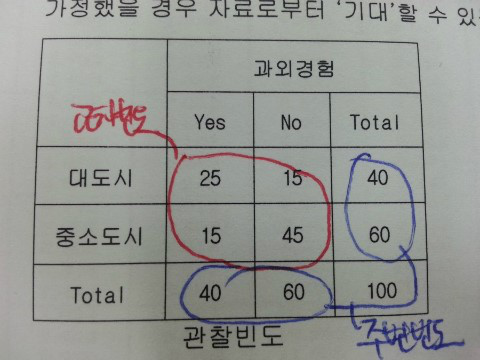

In [176]:
Image.open('imaga.jpg')

In [143]:
x_label=["실제 맞음","실제 아님"]
y_label=["아니라고 판정","맞다고 판정"]

In [131]:
pred90_table=a_mod_log90.pred_table()
pred90_table

array([[3769.,  129.],
       [ 429.,  297.]])

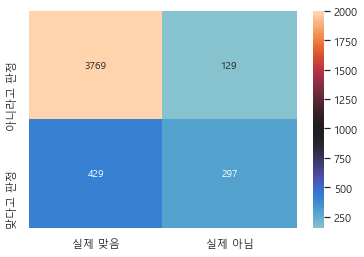

In [144]:
ax=sns.heatmap(pred90_table,vmin=150,xticklabels=x_label, yticklabels=y_label, vmax= 2000,center=1000,annot=True,fmt=".0f")

In [149]:
sp.stats.chi2_contingency(pred90_table, correction = False)

(1034.45842569179,
 5.812616958391144e-227,
 1,
 array([[3538.885,  359.115],
        [ 659.115,   66.885]]))

p 값이 작다 -> 유의하다.

In [127]:
chi2_90=sp.stats.chi2_contingency(pred90_table, correction = False)[3]
chi2_90

array([[3538.885,  359.115],
       [ 659.115,   66.885]])

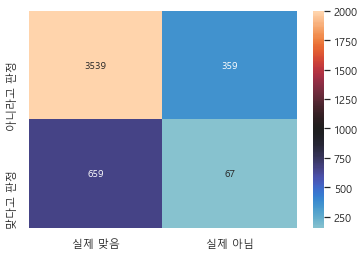

In [145]:
aax=sns.heatmap(chi2_90,vmin=150,xticklabels=x_label, yticklabels=y_label, vmax= 2000,center=1000,annot=True,fmt=".0f")

In [132]:
pred95_table=a_mod_log95.pred_table()
pred95_table

array([[3771.,  127.],
       [ 433.,  293.]])

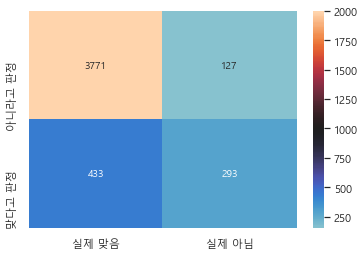

In [146]:
bx=sns.heatmap(pred95_table,vmin=150,xticklabels=x_label, yticklabels=y_label, vmax= 2000,center=1000,annot=True,fmt=".0f")

In [138]:
sp.stats.chi2_contingency(pred95_table, correction = False)


(1020.0775067293595,
 7.765736039657133e-224,
 1,
 array([[3543.943,  354.057],
        [ 660.057,   65.943]]))

p 값이 작다 -> 유의하다.

In [128]:
chi2_95=sp.stats.chi2_contingency(pred95_table, correction = False)[3]
chi2_95

array([[3543.943,  354.057],
       [ 660.057,   65.943]])

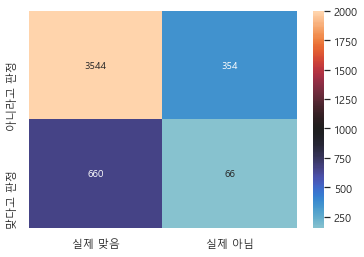

In [147]:
bbx=sns.heatmap(chi2_95,vmin=150,xticklabels=x_label, yticklabels=y_label, vmax= 2000,center=1000,annot=True,fmt=".0f")

In [197]:
pred90_table-sp.stats.chi2_contingency(pred90_table, correction = False)[3]

array([[ 230.115, -230.115],
       [-230.115,  230.115]])

In [198]:
pred95_table-sp.stats.chi2_contingency(pred95_table, correction = False)[3]

array([[ 227.057, -227.057],
       [-227.057,  227.057]])

독립 변수가 많은 모델이 정확도는 더 높을 수 있어도 더 정확하지는 않을 수 있다.\
즉, 정확도가 높다고 정확한 것이 아니다.

## 6.시각화

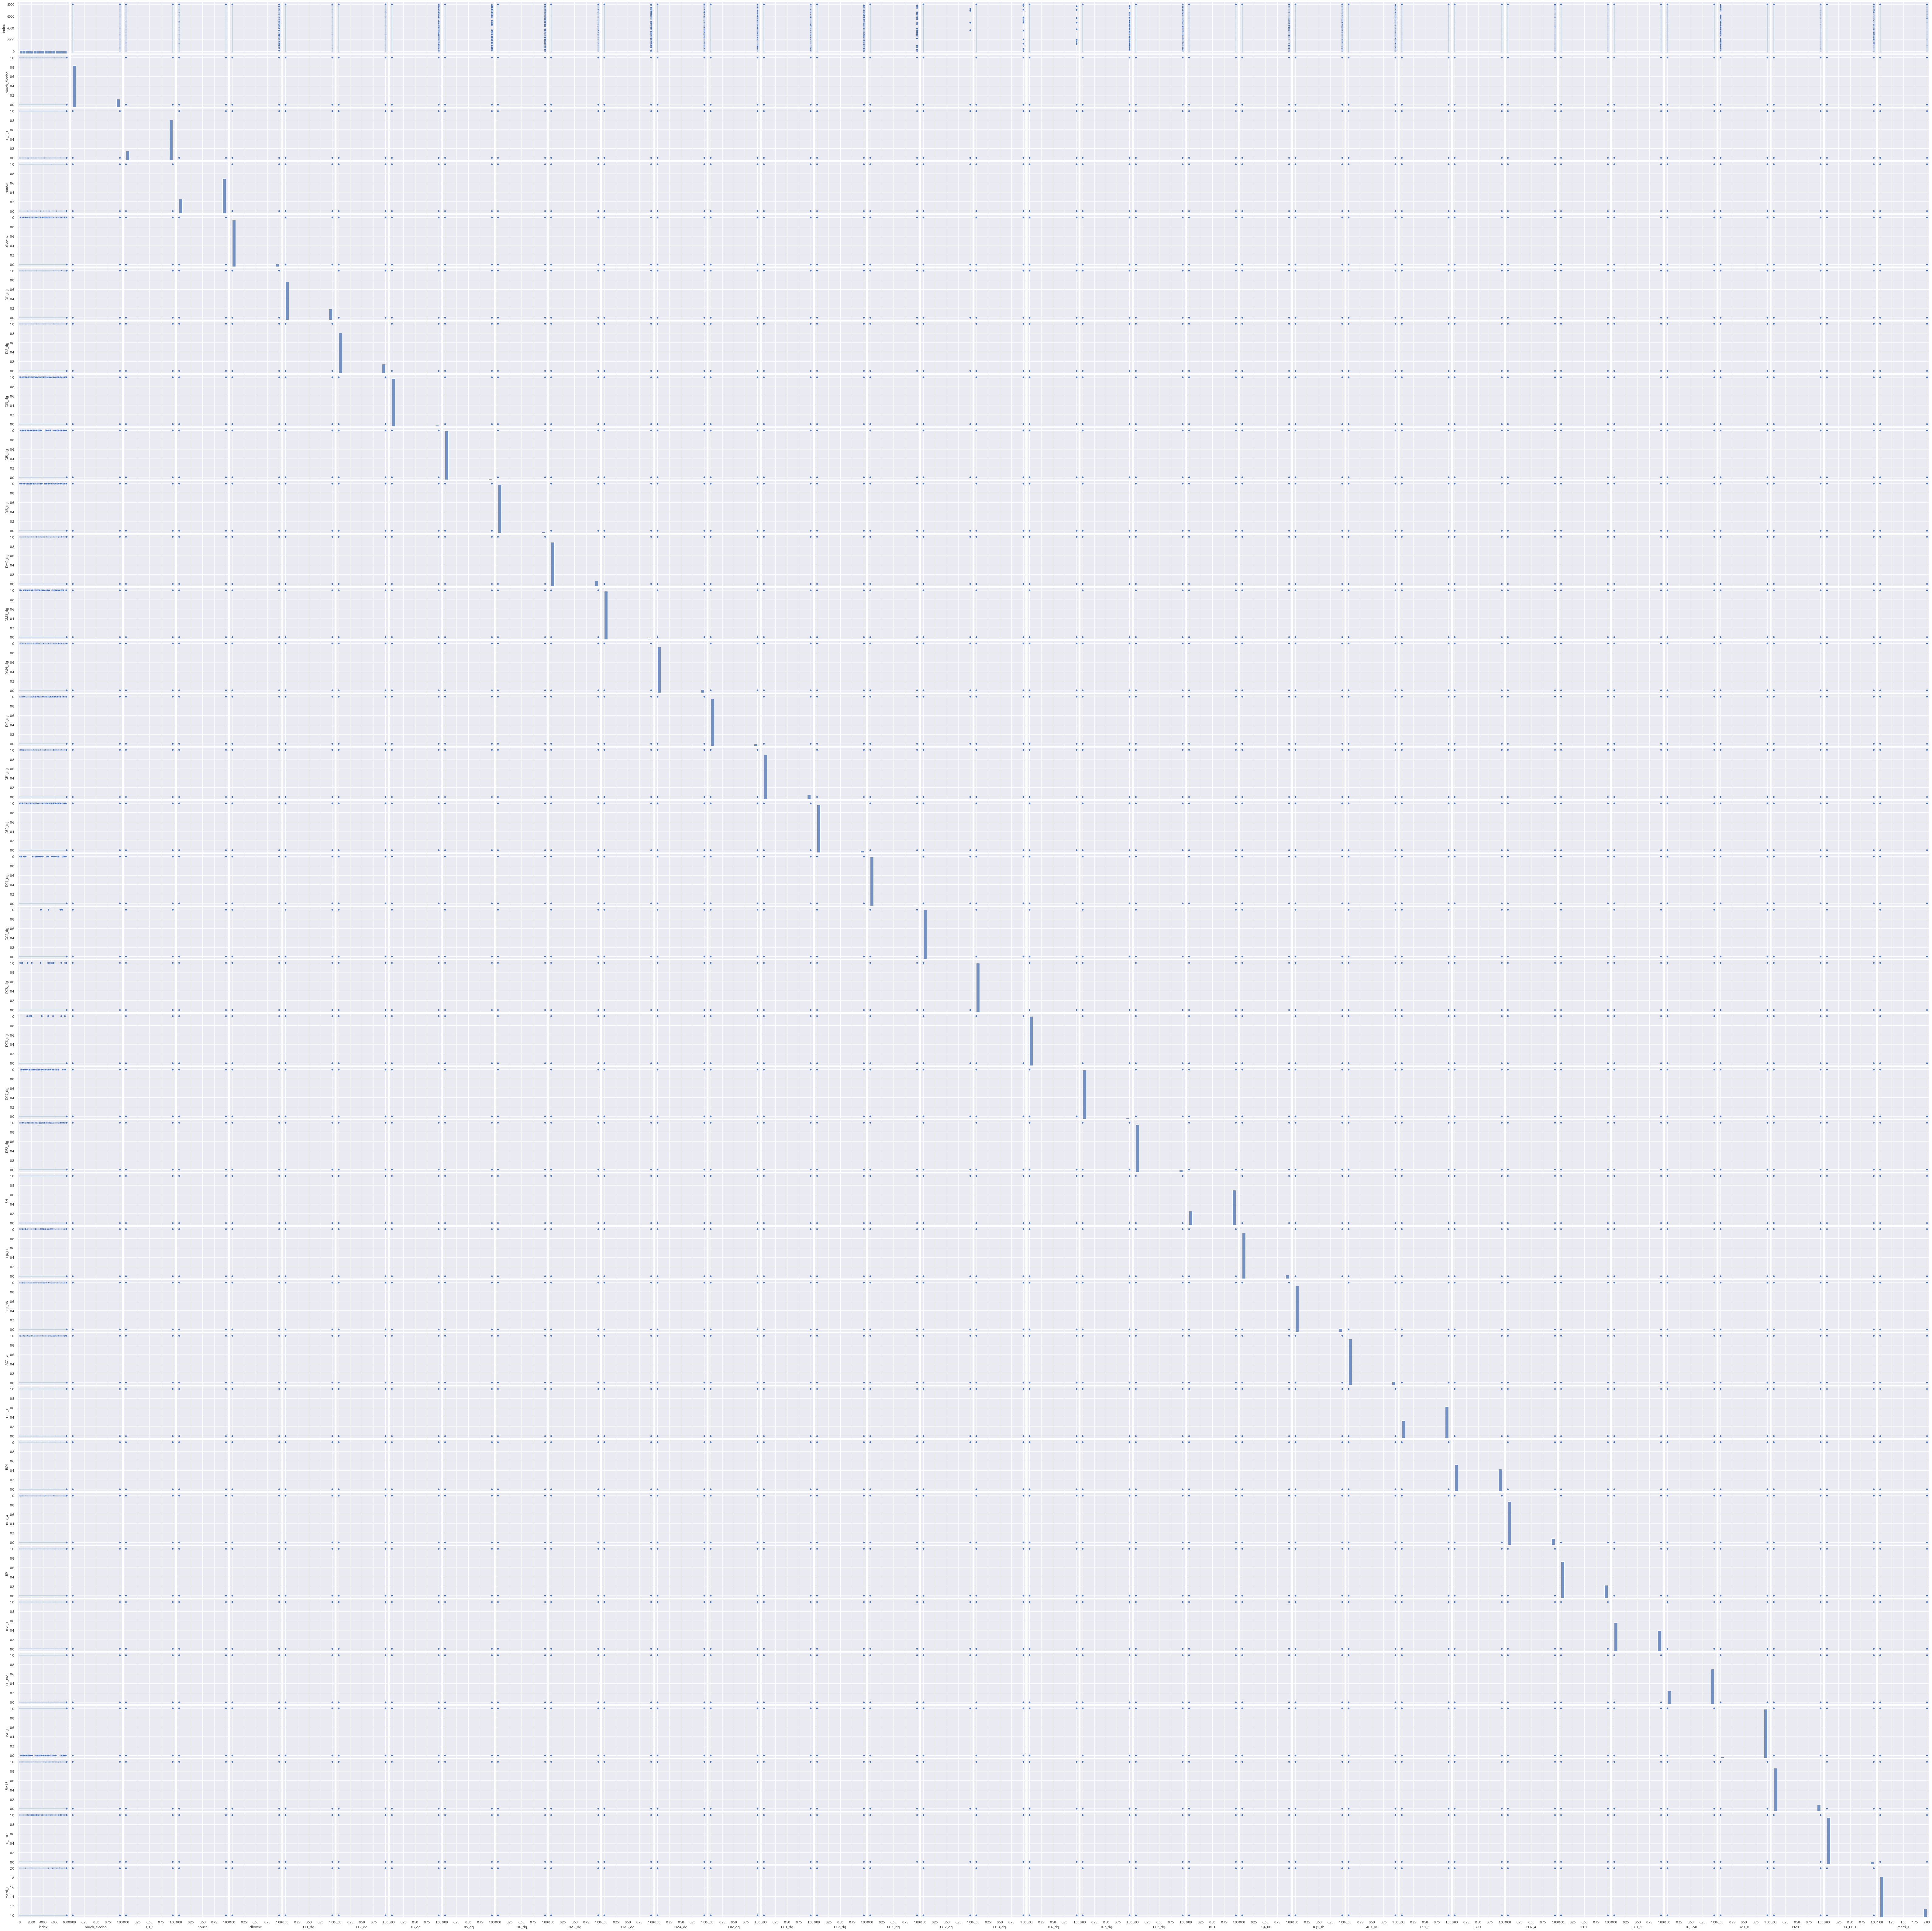

In [161]:
sns.pairplot(real_data)

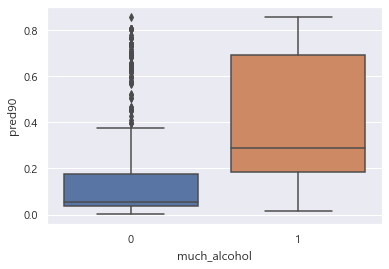

In [164]:
sns.boxplot(x="much_alcohol", y="pred90", data=ma_df)
plt.show()

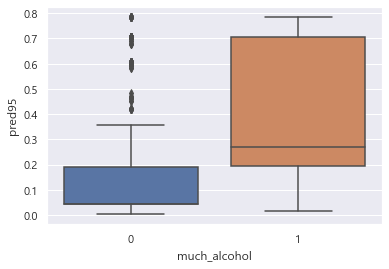

In [165]:
sns.boxplot(x="much_alcohol", y="pred95", data=ma_df)
plt.show()

대체로 잘 예측한 것처럼 생긴 그래프가 나왔다.

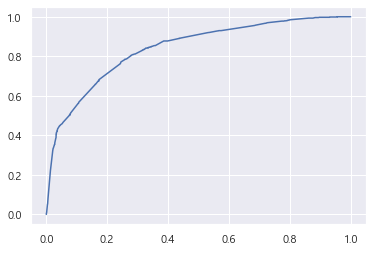

0.8393926319494209

In [167]:
from sklearn.metrics import roc_curve
fpr90, tpr90, thresholds90 = roc_curve(ma_df.much_alcohol, ma_df.pred90)
plt.plot(fpr90, tpr90)
plt.show()
from sklearn.metrics import auc
auc(fpr90, tpr90)

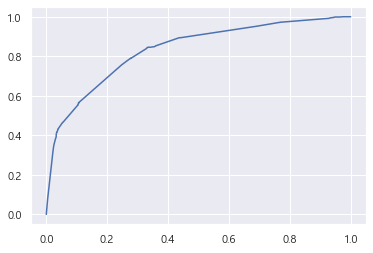

0.8330112426094047

In [173]:
fpr95, tpr95, thresholds95 = roc_curve(ma_df.much_alcohol, ma_df.pred95)
plt.plot(fpr95, tpr95)
plt.show()
auc(fpr95, tpr95)


임계값을 0에서 100으로 변함에 따라 x축(1-specificity)와 y축sensitivity를 나타낸 그래프이다.
thresholds: 임계값-> 이 값 이하는 False, 이상은 True로 판단-> 이 값에 따라 커브 위의 점 위치가 바뀐다.\
TPR: 맞는걸 맞다고 판단할 확률, FPR: 틀린걸 맞다고 판달할 확률\
auc는 아래의 넓이인데, 1에 가까울 수록 좋은 것이다.

# 결론

건강검진 유무,주관적 체형인식,영양교육 여부,폐결핵,활동제한 유무,최근 한 달 와병 유무,골다공증,협심증,기초 생활 수급 유무,심근경색,직업 유무,절주 권유 유무,흡연경험 유무 순서로 술 많이 먹는 사람일 확률에 관여하는 것에 크다.\
카이제곱 검정 결과로 p값이 유의수준보다 작기때문에 유의하다는 결론이 나왔다.\
술을 많이 먹는 사람인지 아닌지를 높은 확률로 올바르게 예측하는 모델이 나왔다.\
독립 변수가 많으면 정확도는 높게 나올 수 있어도 더 정확하지는 않다. 
